In [1]:
from fragsys_analysis import *

In [2]:
main_dir = "./../"
results_dir = os.path.join(main_dir, "results")
figs_dir = os.path.join(main_dir, "figs")

In [16]:
all_prots = pd.read_pickle(os.path.join(results_dir, "all_prots.pkl"))
all_bs_ress = pd.read_pickle(os.path.join(results_dir, "all_bs_ress.pkl"))
all_bss = pd.read_pickle(os.path.join(results_dir, "all_bss.pkl"))
rsa_cluster_dict = load_pickle(os.path.join(results_dir, "rsa_cluster_dict.pkl"))

In [29]:
func_df = load_pickle(os.path.join(results_dir, "prot_func_dict_comb.pkl"))

In [35]:
func_dict = pd.Series(func_df.comb.values, index = func_df.bs_id).to_dict()

In [17]:
rsa_profs = get_rsa_profiles(all_bss, all_bs_ress)
average_rsas_dict = {k: statistics.median(v) for k, v in rsa_profs.items()}

In [18]:
all_bss["lab"] = all_bss.protein + "_" + all_bss.group.astype(str) + "_" + all_bss.bs_id
all_bss["RSA"] = all_bss.lab.map(average_rsas_dict)
all_bss_filt = all_bss.query('RSA == RSA').copy().reset_index(drop = True)

In [19]:
all_bss_filt["rsa_cluster"] = all_bss.lab.map(rsa_cluster_dict)

In [36]:
all_bss_filt["func"] = all_bss.lab.map(func_dict)

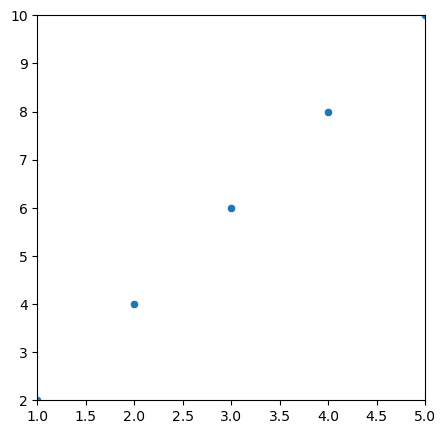

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate some example data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Set the figure dimensions
fig, ax = plt.subplots(figsize=(5, 5))

# Create the scatterplot
scatterplot = sns.scatterplot(x=x, y=y, ax=ax)

# Set equal aspect ratio and adjust axes limits
scatterplot.set_aspect('equal')
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))


# Show the plot
plt.show()


In [84]:
d[["norm_shenkin_rel", "MES"]]

,norm_shenkin_rel,MES
0,54.0885,0.2065
1,20.8011,-0.0623
2,28.6694,-0.0587
3,54.9142,-0.0572
4,29.1975,-0.0578
...,...,...
288,32.9734,0.2898
289,22.9920,0.1831
290,31.4504,0.2410
291,51.0967,-0.0986


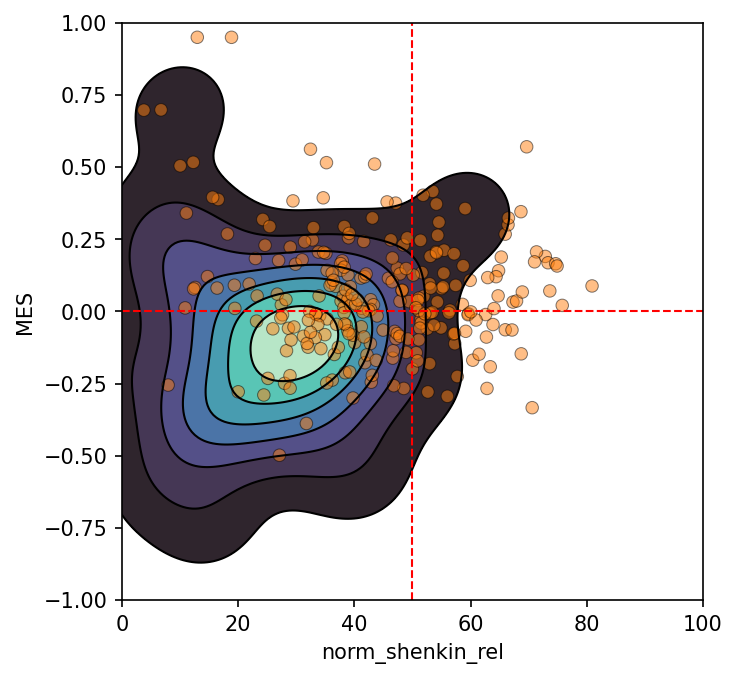

In [111]:
fig = plt.figure(figsize = (5, 5), dpi = 150)
#d = all_bss_filt.query('func == "KF"')
#d_i = all_bss_filt.query('func != "KF"')
d = all_bss_filt

sns.kdeplot(data = d.query('func == "KF"'), x = "norm_shenkin_rel", y = "MES", fill = False, linewidths = 1, color = "k", levels = 8)
sns.kdeplot(data = d.query('func == "KF"'), x = "norm_shenkin_rel", y = "MES", fill = True, cmap = "mako", alpha = 0.9, levels = 8, cbar = False)
plt.ylim(-1, 1)
plt.xlim(0, 100)
plt.axhline(y=0, linestyle = "--", c = "r", lw = 1)
plt.axvline(x=50, linestyle = "--", c = "r", lw = 1)

#sns.scatterplot(data = d.query('func == "KF"'), x = "norm_shenkin_rel", y = "MES", hue = "func", hue_order = ["KF", "UF"], edgecolor = "k")
sns.scatterplot(data = d.query('func != "KF"'), x = "norm_shenkin_rel", y = "MES", hue = "func", hue_order = ["KF", "UF"], edgecolor = "k", legend = False, alpha = 0.5)
plt.show()

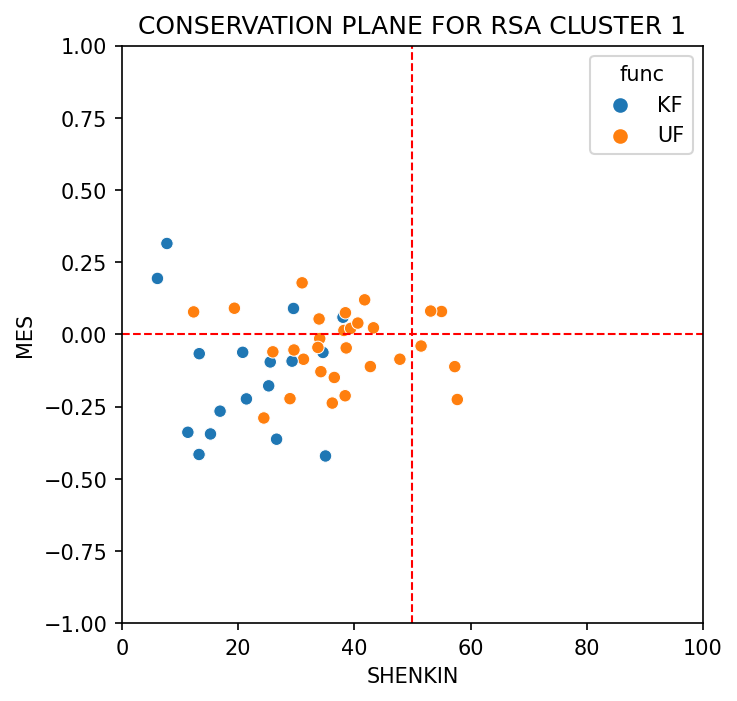

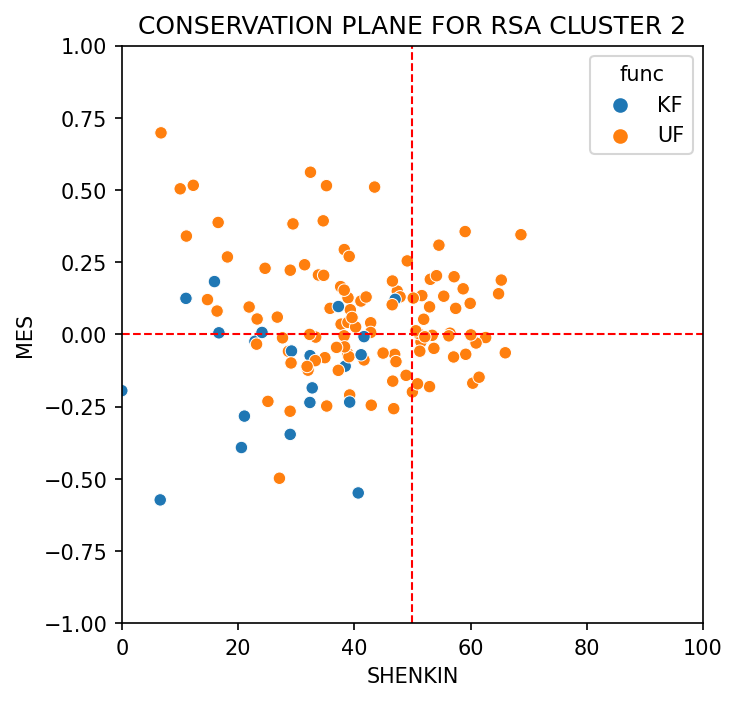

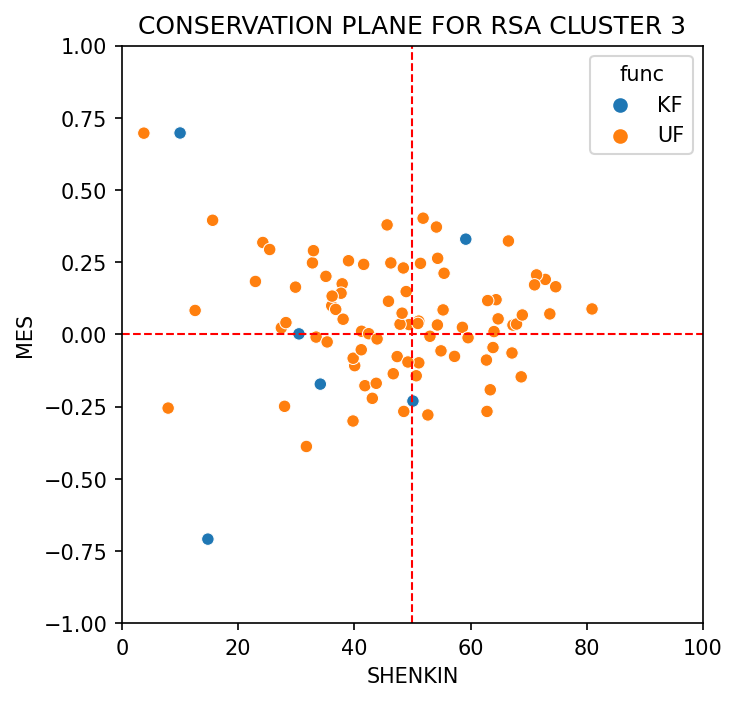

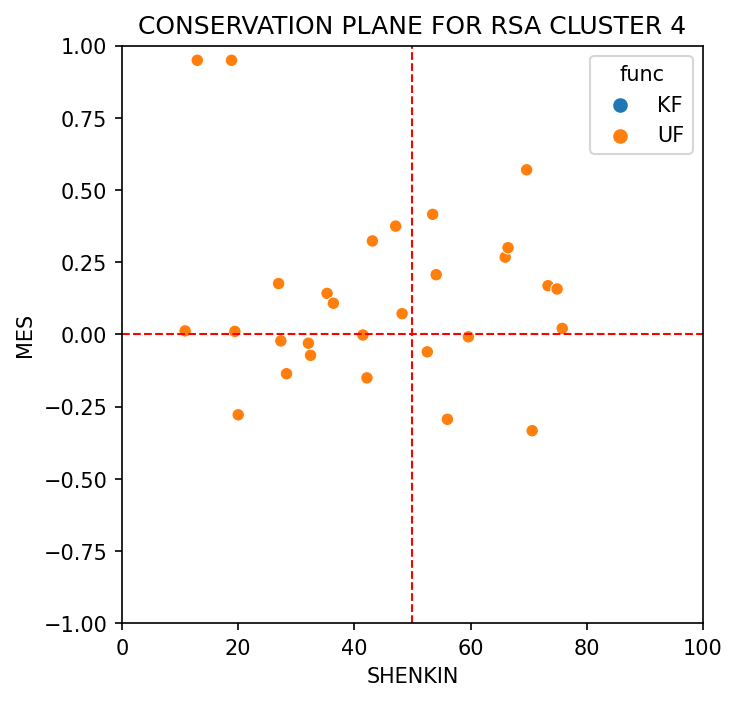

In [42]:
for i in [1,2,3,4]:
    c_i = all_bss_filt.query('rsa_cluster == @i')
    fig = plt.figure(figsize=(5, 5), dpi = 150)
    sns.scatterplot(data = c_i, x = "norm_shenkin_rel", y = "MES", hue = "func", hue_order = ["KF", "UF"])
    plt.ylim(-1, 1)
    plt.xlim(0, 100)
    plt.axhline(y=0, linestyle = "--", c = "r", lw = 1)
    plt.axvline(x=50, linestyle = "--", c = "r", lw = 1)
    plt.title("CONSERVATION PLANE FOR RSA CLUSTER {}".format(str(i)))
    plt.xlabel("SHENKIN")
    plt.ylabel("MES")
    plt.show()